In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Bhargavi pala\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Bhargavi pala\anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\Bhargavi pala\anaconda3\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  stacklevel=1)


In [7]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\bhargavi pala\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
from PIL import Image
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

In [9]:
tweets = pd.read_csv("Tweets.csv")

In [10]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
# Check out the frequency of all possible values in negativereason_gold, airline_sentiment_gold, 
# retweet_count and tweet_coord
tweets['negativereason_gold'].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Customer Service Issue\nLost Luggage         1
Late Flight\nCancelled Flight                1
Bad Flight                                   1
Customer Service Issue\nCan't Tell           1
Late Flight\nFlight Attendant Complaints     1
Flight Attendant Complaints                  1
Late Flight\nLost Luggage                    1
Lost Luggage\nDamaged Luggage                1
Name: negativereason_gold, dtype: int64

In [12]:
tweets['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [13]:
tweets['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64

In [14]:
tweets['tweet_coord'].value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[18.22245647, -63.00369733]       2
                               ... 
[40.64662464, -73.77090177]       1
[51.54381448, -0.00116722]        1
[39.85790482, -104.67039013]      1
[42.201792, -88.3376974]          1
[32.85744983, -97.03548311]       1
Name: tweet_coord, Length: 832, dtype: int64

In [15]:
#drop the columns which are not useful for analysis

tweets.drop('negativereason_gold', axis=1, inplace=True)
tweets.drop('airline_sentiment_gold', axis=1, inplace=True)
tweets.drop('retweet_count', axis=1, inplace=True)
tweets.drop('tweet_coord', axis=1, inplace=True)

tweets.drop('tweet_location', axis=1, inplace=True)
tweets.drop('tweet_created', axis=1, inplace=True)
tweets.drop('user_timezone', axis=1, inplace=True)
tweets.drop('name', axis=1, inplace=True)
#tweets.drop('',axis=1, inplace=True)

# Check the current list of columns
list(tweets.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'text']

In [16]:
unmeaningful = ['i', 'you', 'me', 'to', 'the', 'a', 'my', 'is', 'in', 'and', 'for', 'on', 'of', 
                'your', 'so', 'was', 'have', 'it', 'at', 'with', 'that', 'from', 'do', 'get', 
                'but', 'this', 'can', 'just', 'they', 'we', 'are', 'an', 'be', "i'm", 'will', 
                'if', 'had', 'our', 'about', 'there', 'has', 'been', '-', 'by', 'like', 'or', 
                'as', 'he', 'she', 'it', 'us', 'has' ,"i've", "it's", "don't", 'would', 'am',
               'flight', 'customer', 'any', 'very', "didn't", "you've", 'thing', 'take',
               'other', 'u', '', ' ']

In [17]:
def clean_text(str_in):
    """Remove special characters, @airline/username, empty string and
    unmeaningful words from the original text.

    Args:
        str_in: A string representing a Tweet.

    Returns:
        A string similar to the input string, but it does not have
        special characters, @airline, empty word, or any unmeaningful
        words listed above. For example:

        "thanks"
    """
    res = ""
    str_in = str_in.lower()
    str_arr = str_in.split(' ')
    for word in str_arr:
        # make all words into lower case
        word = word.lower()
        # remove not useful words from the original text
        if '@' in word or word == '' or word[:1] == '&':
            continue
        if word.lower() in unmeaningful:
            continue
        if word.isnumeric():
            continue
        res = res + " " + word
    return res

In [18]:
tweets["text"] = tweets["text"].apply(clean_text)

In [19]:
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,what said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,plus added commercials experience... tacky.
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,today... must mean need another trip!
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,"really aggressive blast obnoxious ""entertainm..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,really big bad


# Part 1) Count the neutral, positive and negative comments.

In [21]:
sentiments = tweets['airline_sentiment'].unique()
#here we know there are 3 types only 
sentiments

array(['neutral', 'positive', 'negative'], dtype=object)

In [22]:
total_negative = tweets[tweets['airline_sentiment'] == 'negative']['airline_sentiment_confidence'].sum()
total_positive = tweets[tweets['airline_sentiment'] == 'positive']['airline_sentiment_confidence'].sum()
total_neutral = tweets[tweets['airline_sentiment'] == 'neutral']['airline_sentiment_confidence'].sum()

values = [total_neutral, total_positive, total_negative]
dictionary1 = {'Airline Sentiment':sentiments, 'Count':values} 

dfSentimentCount = pd.DataFrame(dictionary1)
dfSentimentCount.head(3)

,Airline Sentiment,Count
0,neutral,2551.4171
1,positive,2060.6280
2,negative,8566.4269


# Data Visualization

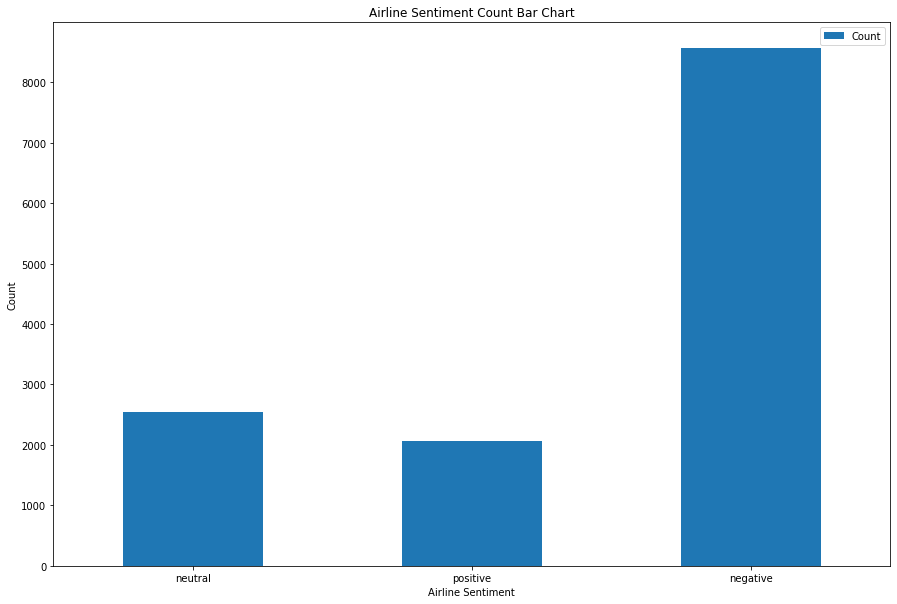

In [23]:
temp = dfSentimentCount.plot.bar(x='Airline Sentiment', y='Count', rot=0, figsize=(15,10))

# Add title and axis names
plt.title('Airline Sentiment Count Bar Chart')
plt.xlabel('Airline Sentiment')
plt.ylabel('Count')
 
# Show graphic
plt.show()

# Part 2) Count the neutral, positive and negative comments for each airline.

In [24]:
listOfAirlines = tweets['airline'].unique()
listOfAirlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [25]:
neutralCount = []
positiveCount = []
negativeCount = []
totalCount = []

for airline in listOfAirlines:
    neuC = tweets.query("airline == @airline and airline_sentiment == 'neutral'")['airline_sentiment_confidence'].sum()
    posC = tweets.query("airline == @airline and airline_sentiment == 'positive'")['airline_sentiment_confidence'].sum()
    negC = tweets.query("airline == @airline and airline_sentiment == 'negative'")['airline_sentiment_confidence'].sum()
    tot = neuC + posC + negC
    neutralCount.append(neuC)
    positiveCount.append(posC)
    negativeCount.append(negC)
    totalCount.append(tot)

df2 = pd.DataFrame(index=listOfAirlines);
df2['Neutral Count'] = neutralCount
df2['Positive Count'] = positiveCount
df2['Negative Count'] = negativeCount
df2

,Neutral Count,Positive Count,Negative Count
Virgin America,143.3610,134.9727,163.2137
United,564.4000,421.1578,2457.5967
Southwest,548.5365,505.0800,1091.7521
Delta,599.5580,471.7084,861.6031
US Airways,313.1524,231.2555,2140.1501
American,382.4092,296.4536,1852.1112


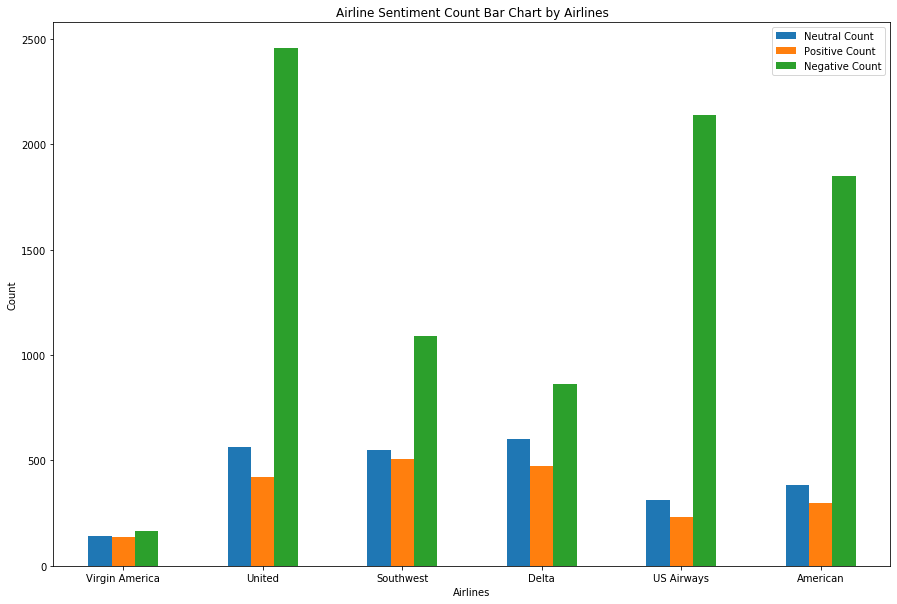

In [26]:
plt2 = df2.plot.bar(rot=0, figsize=(15,10))

# Add title and axis names
plt.title('Airline Sentiment Count Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
 
# Show graphic
plt.show()

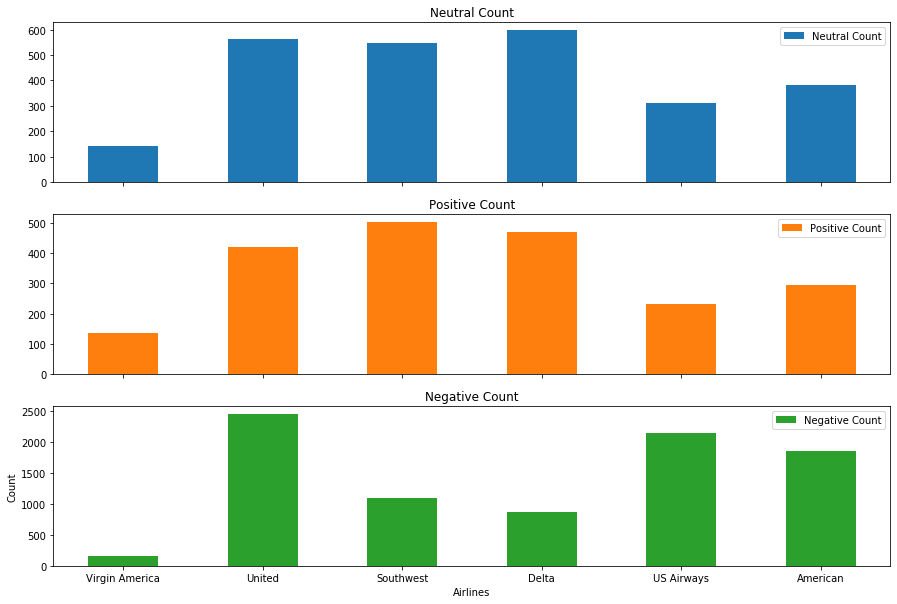

In [27]:
plt3 = df2.plot.bar(rot=0, subplots=True, figsize=(15,10))

# Add axis names
plt.xlabel('Airlines')
plt.ylabel('Count')
 
# Show graphic
plt.show()

In [28]:
percentNeg = []
for neg, tot in zip(negativeCount, totalCount):
    perc = neg/tot
    percentNeg.append(perc)
    
df3 = pd.DataFrame(index=listOfAirlines)
df3['Negative Feedback %'] = percentNeg
df3

,Negative Feedback %
Virgin America,0.369640
United,0.713763
Southwest,0.508888
Delta,0.445764
US Airways,0.797208
American,0.731778


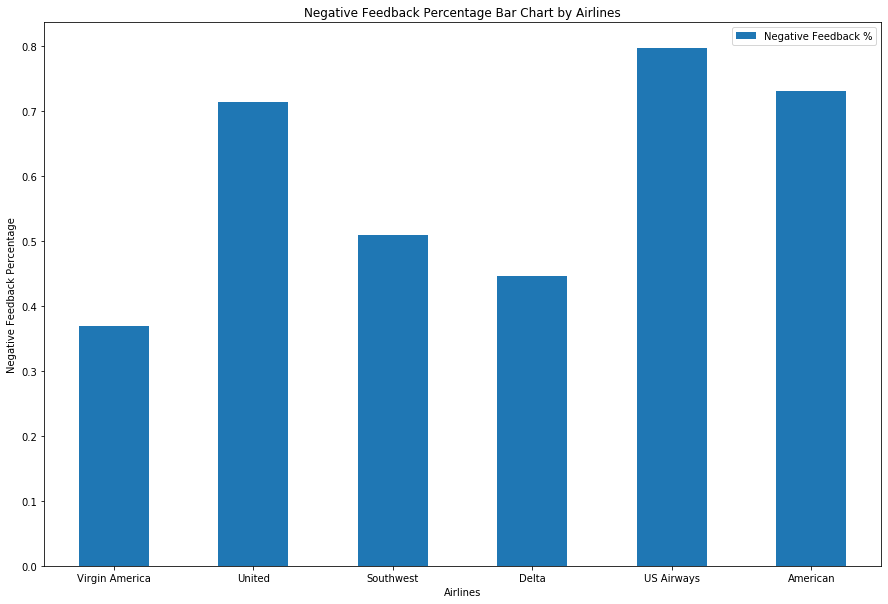

In [29]:
plt4 = df3.plot.bar(rot=0, figsize=(15,10))

# Add axis names
plt.title('Negative Feedback Percentage Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Negative Feedback Percentage')
 
# Show graphic
plt.show()

# Which words are the most prevalent, for all positive feedbacks, neutral feedbacks, and negative feedbacks?

In [30]:
negative_text = tweets[tweets['airline_sentiment'] == 'negative']['text']
neutral_text = tweets[tweets['airline_sentiment'] == 'neutral']['text']
positive_text = tweets[tweets['airline_sentiment'] == 'positive']['text']

We need to count frequency for all three lists. Therefore, instead of counting all words separately for three times, we can have a function count_words to count word frequencies in the input list and return its corresponding frequency dictionary. Such function will reduce repetitive code, improve coding style and make things effective.

In [31]:
def count_words(texts):
    """Count word frequency from the words in input list.

    Count word frequency for all the words in the input string list,
    excluding empty string.

    Args:
        texts: A list of Tweets, which is also a list of strings.

    Returns:
        A dict mapping words to the corresponding frequency in 
        the texts input list. For example:

        {'not': 1271,
         'no': 1213,
         'cancelled': 911}
         
        If the word is not existed in the texts input list, then that
        frequency cannot be found in the returning dict.
    """
    result = {}
    for text in texts:
        text_arr = text.split(' ')
        for word in text_arr:
            # exclude empty string
            if word == '':
                continue
            # increase the frequency count in the returning dict
            if word in result:
                count = result[word]
                result[word] = count + 1
            else:
                result[word] = 1
    return result

In [32]:
negative_dict = count_words(negative_text)
neutral_dict = count_words(neutral_text)
positive_dict = count_words(positive_text)

In [33]:
sorted_negative_dict = sorted(negative_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_neutral_dict = sorted(neutral_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_positive_dict = sorted(positive_dict.items(), key=operator.itemgetter(1), reverse=True)

In [34]:
# convert dictionaries to dataframes
negative_df = pd.DataFrame(sorted_negative_dict, columns=['Word', 'Frequency'])
negative_df

,Word,Frequency
0,not,1271
1,no,1213
2,cancelled,911
3,now,643
4,service,541
...,...,...
18003,answers!,1
18004,"play,",1
18005,delays👌,1
18006,phones!,1


In [35]:
neutral_df = pd.DataFrame(sorted_neutral_dict, columns=['Word', 'Frequency'])
neutral_df


,Word,Frequency
0,need,159
1,please,146
2,how,141
3,what,140
4,when,136
...,...,...
8161,share.,1
8162,"george,",1
8163,process:,1
8164,http://t.co/4gr39s91dl”😂,1


In [36]:
positive_df = pd.DataFrame(sorted_positive_dict, columns=['Word', 'Frequency'])
positive_df

,Word,Frequency
0,thank,452
1,thanks,397
2,great,193
3,you!,134
4,love,119
...,...,...
6362,http://t.co/drw08djhai,1
6363,relations,1
6364,concerns,1
6365,"directly,",1


Analysis
From the lists above, we can get a clear view of what words are more frequent to appear in three kinds of airline sentiments.

For negative feedback, "not", "no", "cancelled", "now" and "service" have high word frequencies. This means that people tend to question the airlines about their services and their cancelled flights on Twitter. The negation words like "not" and "no" represent that customers are trying to deny the quality of those airlines.

For neutral feedback, "need", "please", "how", "what" and "when" have high word frequencies. This means that customers looks forward to having changes in those airlines. These words do not have full negative attitudes, but these show the urgency that people wants to see changes from the airlines investigated.

For positive feedback, words like "thank", "thanks", "great", "you!" and "love" are the most frequent ones. This means people tend to appreciate the airlines when they have very good flying experiences. Even with "!", customers showed that they were happy and satisfied.

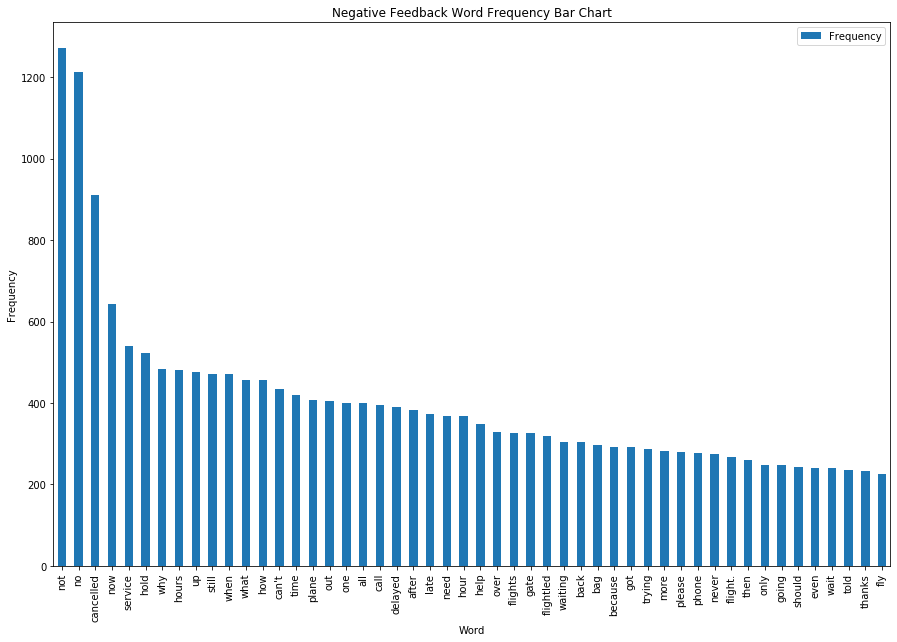

In [37]:
negative_df.set_index('Word')
plt5 = negative_df.head(50).plot.bar(x='Word', y='Frequency', figsize=(15,10))

# Add title and axis names
plt.title('Negative Feedback Word Frequency Bar Chart')
plt.xlabel('Word')
plt.ylabel('Frequency')
 
# Show graphic
plt.show()


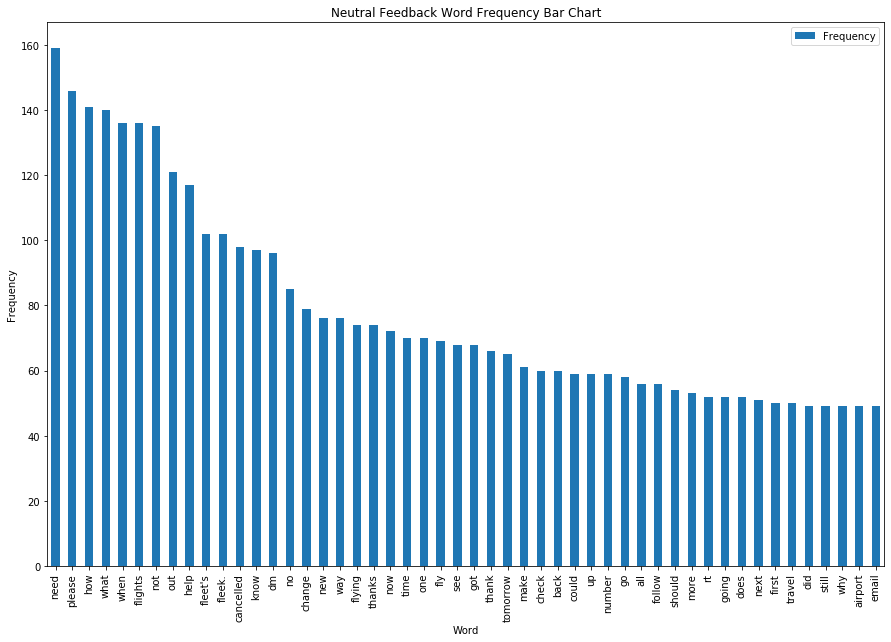

In [38]:
neutral_df.set_index('Word')
plt6 = neutral_df.head(50).plot.bar(x='Word', y='Frequency', figsize=(15,10))

# Add title and axis names
plt.title('Neutral Feedback Word Frequency Bar Chart')
plt.xlabel('Word')
plt.ylabel('Frequency')
 
# Show graphic
plt.show()

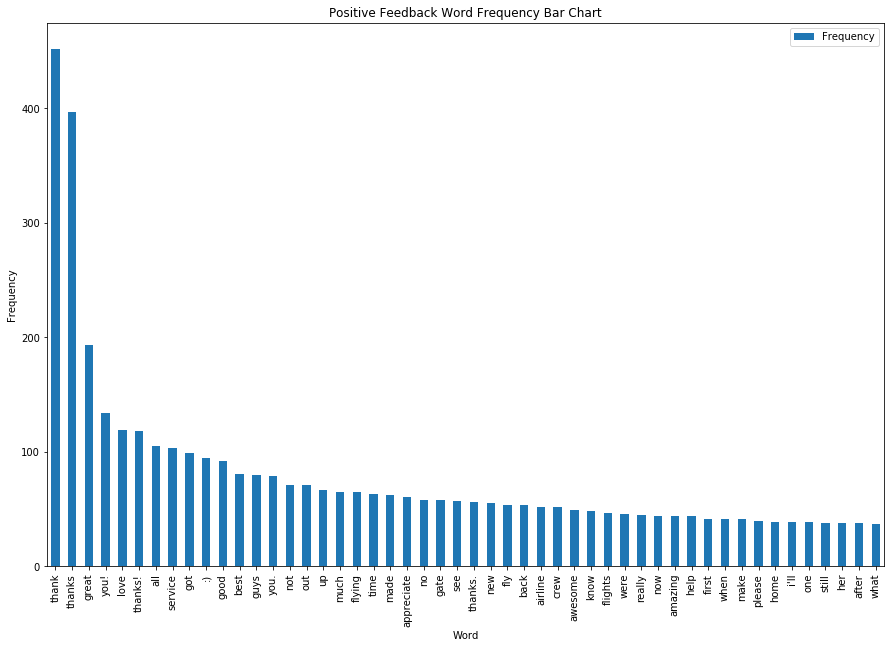

In [39]:
positive_df.set_index('Word')
plt7 = positive_df.head(50).plot.bar(x='Word', y='Frequency', figsize=(15,10))

# Add title and axis names
plt.title('Positive Feedback Word Frequency Bar Chart')
plt.xlabel('Word')
plt.ylabel('Frequency')
 
# Show graphic
plt.show()

Wordcloud for Word Frequency from all Negative Feedback


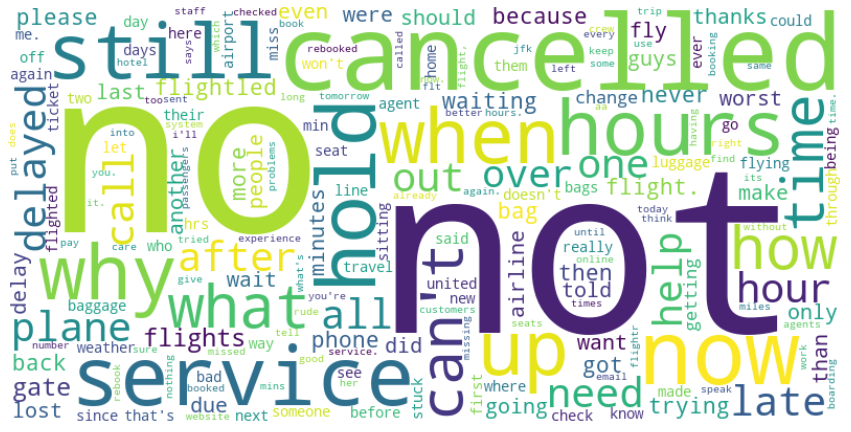

In [40]:
print("Wordcloud for Word Frequency from all Negative Feedback")

negative_wordcloud = WordCloud(background_color="white", width=800, height=400)
negative_wordcloud.generate_from_frequencies(negative_dict)
plt.figure(figsize=(15,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
np.array(negative_wordcloud).shape

(400, 800, 3)

Wordcloud for Word Frequency from all Neutral Feedback


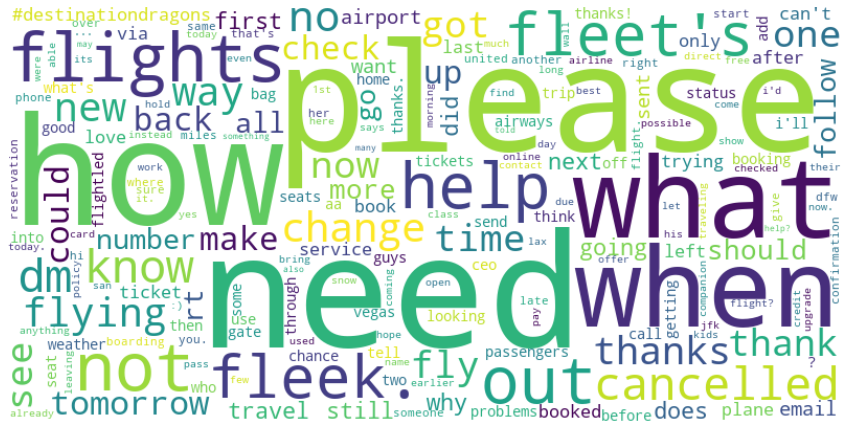

In [42]:
print("Wordcloud for Word Frequency from all Neutral Feedback")

neutral_wordcloud = WordCloud(background_color="white", width=800, height=400)
neutral_wordcloud.generate_from_frequencies(neutral_dict)
plt.figure(figsize=(15,10))
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The neutral feedback wordcloud accords with our previous observation from the list and bar chart. "need", "please", "how", "what", "when", "flights", "not" are the most frequently appearing words for neutral feedback on social media.

Wordcloud for Word Frequency from all Positive Feedback


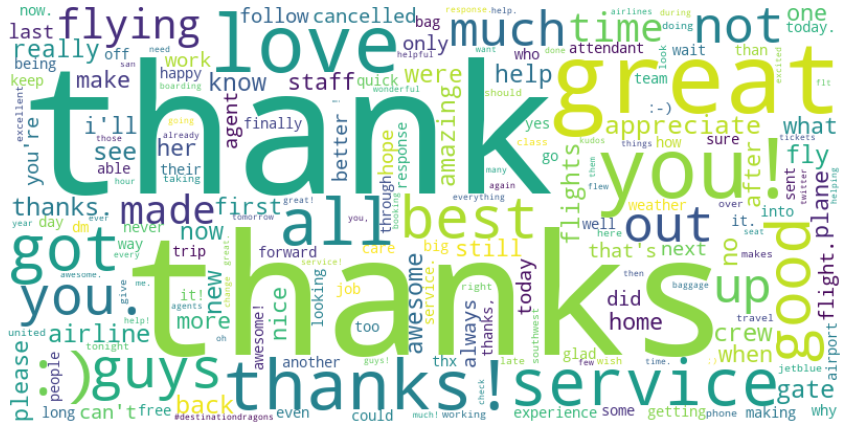

In [43]:
print("Wordcloud for Word Frequency from all Positive Feedback")

positive_wordcloud = WordCloud(background_color="white", width=800, height=400)
positive_wordcloud.generate_from_frequencies(positive_dict)
plt.figure(figsize=(15,10))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The positive feedback wordcloud accords with our previous observation from the list and bar chart. "thank", "thanks", and "great" are the three most frequently appearing words for positive feedback on social media.

From the observation and analysis above, we can see that some of the words in hypothesis are the most frequently appeared ones in Tweets, while others are not. For negative feedbacks, it looks like most of the negative feedbacks are related to flight cancellation, rather than airline quality problems such as "rude" and "dirty". For neutral feedbacks, "please" does have high frequency, but "help", "travel", "airline" and "fine" are not. The actual words are "how", "what" and "when", which means people are more likely to question those airlines on social media when their experiences are neutral. For positive feedbacks, "thanks" and "love" do have high word frequency, but others are not. Other most frequent words are "great" and "you!". The exclamation point here shows the excitement and appreciation of customers.

Therefore, the hypothesis is partially true, and partially false.

# Create a model which can identify airline sentiments of future Tweets.

In [45]:
X_train = tweets.loc[:11711, 'text'].values
Y_train = tweets.loc[:11711, 'airline_sentiment'].values
X_test = tweets.loc[11712:, 'text'].values
Y_test = tweets.loc[11712:, 'airline_sentiment'].values

Then we can make use of TfidfVecterizer to transfer Tweet contents into vectors, in order to train the model.

In [46]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

print("The shape of train vector is", train_vectors.shape)
print("The shape of test vector is", test_vectors.shape)

The shape of train vector is (11712, 12249)
The shape of test vector is (2928, 12249)


The dataset sample amount is larger than 50.
The model should predict a category.
We have labeled data.
The dataset sample amount is smaller than 100K.
We have text data.
According to the machine learning map page, we can try both linear SVC (Support Vector Classification) model and Naive Bayes model, and choose the one with higher accuracy.

In [47]:
svc = svm.SVC()
clf = svc.fit(train_vectors, Y_train)

In [48]:
predicted = clf.predict(test_vectors)
print("Predicted result:", predicted)
print("Accuracy score from linear SVC model:", accuracy_score(Y_test, predicted))

Predicted result: ['negative' 'negative' 'positive' ... 'neutral' 'negative' 'negative']
Accuracy score from linear SVC model: 0.8159153005464481


In [49]:
nb = MultinomialNB()
clf2 = nb.fit(train_vectors, Y_train)

In [50]:
predicted2 = clf2.predict(test_vectors)
print("Predicted result:", predicted2)
print("Accuracy score from Naive Bayes model:", accuracy_score(Y_test, predicted2))

Predicted result: ['negative' 'negative' 'neutral' ... 'negative' 'negative' 'negative']
Accuracy score from Naive Bayes model: 0.7506830601092896


As you can see, 0.816 is larger than 0.751. Therefore, SVC model has a higher accuracy score compared to Naive Bayes model. The actual accuracy is a little bit higher than the one we predicted in the hypothesis section, which is 70% to 80%.

Now, the model clf can be used to predict airline sentiments of future Tweets. This can make data analysts' work much easier, and can also help those airlines see what might be the reasons for their negative feedbacks. Then, they can improve their flights, services, and quality accordingly. Finally, they can make more profits by appropriately analyzing such user feedback data.